In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# 3.2.8
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [ ]:
clf_rf = RandomForestClassifier()
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

In [ ]:
grid_search_cv_clf.best_params_
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

In [ ]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

In [ ]:
# 3.2.13
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(x_train, y_train)
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [33]:
# 3.5.3
training_mush = pd.read_csv('data/training_mush.csv')
clf_rf = RandomForestClassifier(random_state=0)
parameters = {'n_estimators': range(10, 51, 10),
              'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1, 8),
              'min_samples_split': range(2, 10, 2),}
X_train = training_mush.iloc[:, 0:22]
y_train = training_mush['class']


In [ ]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X=X_train, y=y_train)

In [36]:
print(grid_search_cv_clf.best_params_)
grid_search_cv_clf.best_estimator_.score(X_train, y_train)

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


1.0

<Axes: >

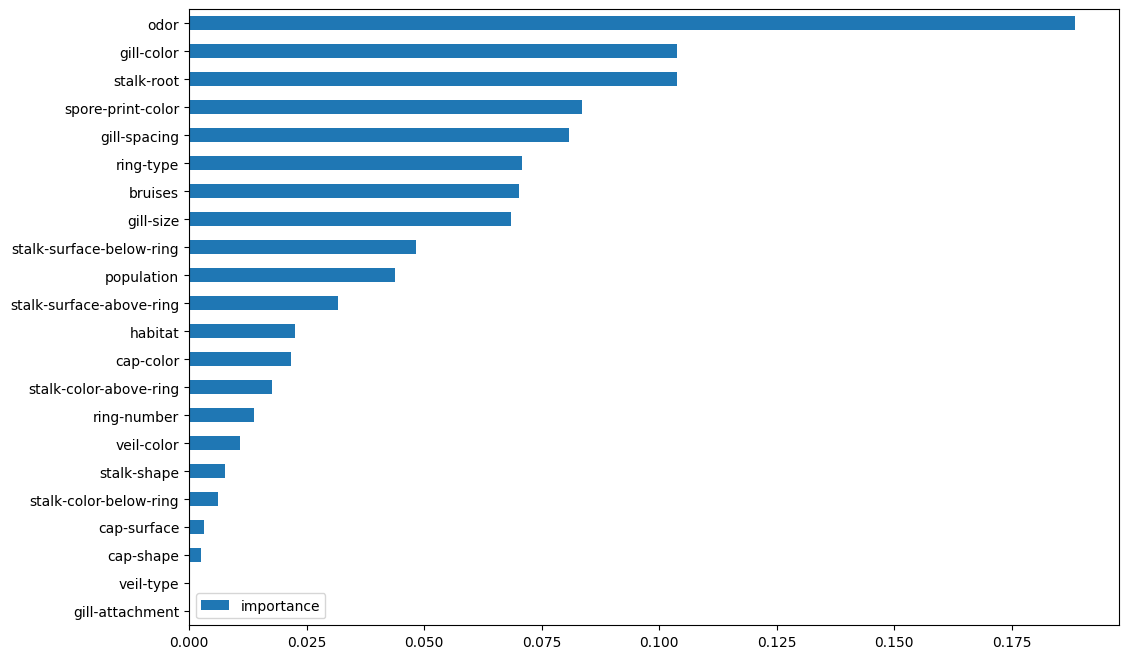

In [38]:
# 3.5.4
imp = pd.DataFrame(grid_search_cv_clf.best_estimator_.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


In [50]:
# 3.5.5
X_test = pd.read_csv('data/testing_mush.csv')
predictions = grid_search_cv_clf.best_estimator_.predict(X_test)
sum(predictions)


976

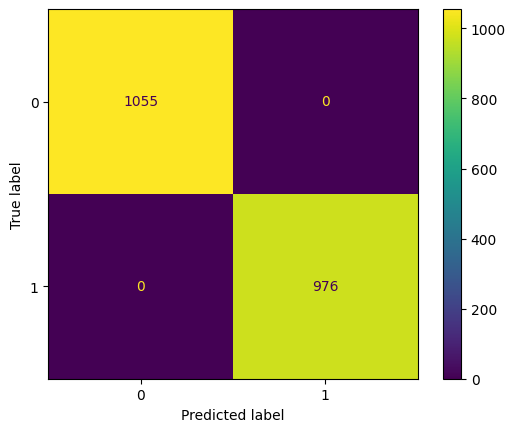

In [53]:
# 3.5.6
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test = pd.read_csv('data/testing_y_mush.csv')
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

In [61]:
# 3.5.7
data_inv = pd.read_csv('data/invasion.csv')
X_test = pd.read_csv('data/operative_information.csv')
y_train = data_inv.pop('class')
X_train = data_inv

In [66]:
clf_rf = RandomForestClassifier(random_state=42)
parameters = {'n_estimators': range(10, 51, 10),
              'max_depth': range(2, 10), 
              'min_samples_split': range(2, 5)}
cv_search_clf_rf = GridSearchCV(clf_rf, parameters, cv=3, n_jobs=-1)

In [76]:
cv_search_clf_rf.fit(X_train, y_train)
cv_search_clf_rf.best_params_

{'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 20}

In [81]:
predictions = cv_search_clf_rf.best_estimator_.predict(X_test)
pd.DataFrame(predictions).value_counts() # 230 595 675

0        
fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

<Axes: ylabel='var'>

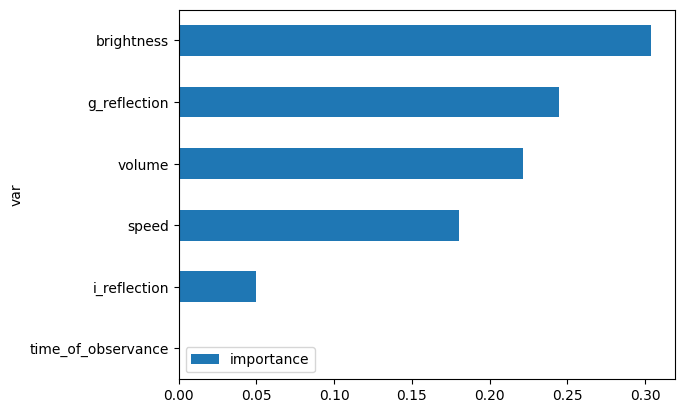

In [106]:
# 3.5.8
fi_df = pd.DataFrame({'importance': cv_search_clf_rf.best_estimator_.feature_importances_, 'var': X_train.columns})
fi_df.sort_values('importance', ascending=True).plot.barh(y='importance', x='var')
# brightness g_ref volume